# Codex Chat Notebook demo
I start with an empty jupyter notebook, and incrementally add instructions for each cell. Written for Jupyter notebook.
The instructions are comment string starts with "##" (optionally with details quoted by """), and the line after the instructions or details should be a generated executable Python 3 code block. The instructions are given by a human via a speech-to-text program in a noisy environment, therefore the text maybe confusing and requires correction but the general context is using python for data analysis.

There are some suggestions for doing so:
 - To display the images, plots and charts, use "matplotlib" (DO NOT USE IPython.display)
 - To read an image from an URL or local path, use "imageio.imread(filepath_or_url)", as an example image, this is an url to a protein image from the human protein atlas: https://images.proteinatlas.org/115/672_E2_1_blue_red_green.jpg
 - To manipulate pixels in an image array, use "numpy" or "scikit-image"
 - To run models with the BioEngine, we need to first import the libarary with "from pyotritonclient import execute", then use:
    results = await execute(
        inputs=[
            image.astype("float32"),
            {"diameter": 30}
        ], # A list of inputs, required different number of inputs for different models, each element can be an numpy array, a dict or a list
        server_url='https://ai.imjoy.io/triton', # the url of the server
        model_name='cellpose-python', # the name of the model
        ) # this execute function exectues the model (specified by model_name) on the server and return results. execute is an async function, it should used with await.

    Currently, the server https://ai.imjoy.io/triton supports the following models:
        1. "cellpose-python" for image segmentation with the cellpose model, it requires two inputs, the first one is a image numpy array with 3 dimensions and the data type should be float32, the second one is a dictionary for the parameters, the available parameters is "diameter" for specifiy the object size and "channels" to specify the cell and nuclei channel, the default channels value is [1, 2]. The returned results is a dictionary contains a key named "mask" (results["mask"]) for the mask image. To display the image, use "plt.imshow(mask[0, :, :])".
        2. "stardist" for image segmentation with the stardist model: similar to "cellpose-python", it also requires two inputs and has the same input format, however, the second input should be an empty dictionary. The returned results is the same as cellpose model.



Besides the above rules, the following cases when special command are generated (and the special command should not contain correction comments):
 - To cancel or undo last cell, generate "%undo"
 - To execute all the cells, generate "%run-all"
 - To execute the current or active cell, generate "%run"

# Import and install image IO

In [ ]:
import imageio
!pip install imageio

# Print hello world

In [107]:
print("Hello world")

Hello world


# Download an image on the human protein Atlas and display it with matplotlib

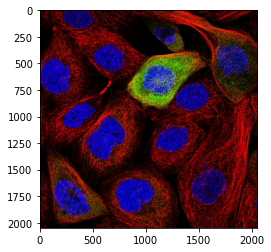

In [132]:
import imageio
import matplotlib.pyplot as plt

image = imageio.imread("https://images.proteinatlas.org/115/672_E2_1_blue_red_green.jpg")
plt.imshow(image)
plt.show()

# Segment the image with cellpose

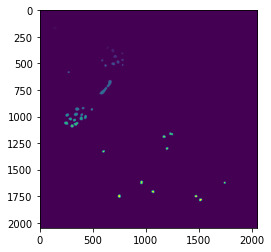

In [135]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from pyotritonclient import execute

image = imageio.imread("https://images.proteinatlas.org/115/672_E2_1_blue_red_green.jpg")
results = await execute(
    inputs=[
        image.astype("float32"),
        {"diameter": 30}
    ], # A list of inputs, required different number of inputs for different models, each element can be an numpy array, a dict or a list
    server_url='https://ai.imjoy.io/triton', # the url of the server
    model_name='cellpose-python', # the name of the model
    ) # this execute function exectues the model (specified by model_name) on the server and return results. execute is an async function, it should used with await.

mask = results["mask"][0, :, :]
plt.imshow(mask)
plt.show()

# Segment it again with diameter=100

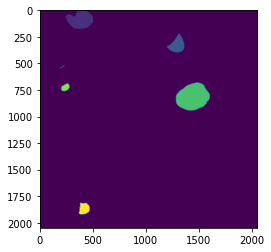

In [136]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from pyotritonclient import execute

image = imageio.imread("https://images.proteinatlas.org/115/672_E2_1_blue_red_green.jpg")
results = await execute(
    inputs=[
        image.astype("float32"),
        {"diameter": 100}
    ], # A list of inputs, required different number of inputs for different models, each element can be an numpy array, a dict or a list
    server_url='https://ai.imjoy.io/triton', # the url of the server
    model_name='cellpose-python', # the name of the model
    ) # this execute function exectues the model (specified by model_name) on the server and return results. execute is an async function, it should used with await.

mask = results["mask"][0, :, :]
plt.imshow(mask)
plt.show()

# Now try 200

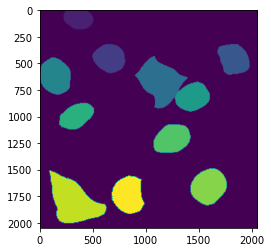

In [137]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from pyotritonclient import execute

image = imageio.imread("https://images.proteinatlas.org/115/672_E2_1_blue_red_green.jpg")
results = await execute(
    inputs=[
        image.astype("float32"),
        {"diameter": 200}
    ], # A list of inputs, required different number of inputs for different models, each element can be an numpy array, a dict or a list
    server_url='https://ai.imjoy.io/triton', # the url of the server
    model_name='cellpose-python', # the name of the model
    ) # this execute function exectues the model (specified by model_name) on the server and return results. execute is an async function, it should used with await.

mask = results["mask"][0, :, :]
plt.imshow(mask)
plt.show()